## Sentiment Analysis of Amazon Consumer Reviews

#### Source:
https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products

### About Data
This is a list of over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by Datafiniti's Product Database. The dataset includes basic product information, rating, review text, and more for each product.

### Objectives

1. What is the review recomandation of a product based on ratings?
2. What are the most reviewed products and less reviewed produts?
3. How many positive and negative reviews in the dataset?
4. What are the most used words in positive and negative reviews and how many are they?
5. Apply the suitable imabalanced dataset handling method.

## Procedure
1. Import necessary libraries.
2. Obtain the information about dataset.
3. Visualisation.
4. Convert text reviews into positive and negative reviews.
5. Clean the text and applying TF-IDF for the sentiment analysis.
6. Appplying the Machine Learning models.






In [1]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
from plotly.offline import iplot
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.tools as tls
import cufflinks as cf
import seaborn as sb
import pandas as pd
import plotly as py
py.offline.init_notebook_mode(connected=True)
import numpy as np
%matplotlib inline
import wordcloud
cf.go_offline()
import warnings
import string
import re

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Dataset preview
df = pd.read_csv("1429_1.csv")
df.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [4]:
# Number of rows and columns in dataset
df.shape

(34660, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
# Null values in each column of the dataset
df.isnull().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64


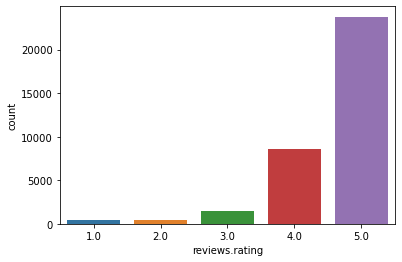

In [7]:
# Bar plot for reviews.rating
sb.countplot(x = "reviews.rating", data = df)
print(df['reviews.rating'].value_counts())

Interpretation: The rating 5.0 is most used rating for the products it means product sold by the amazon are good.

Amazon                          34639
Amazon Digital Services, Inc       21
Name: manufacturer, dtype: int64


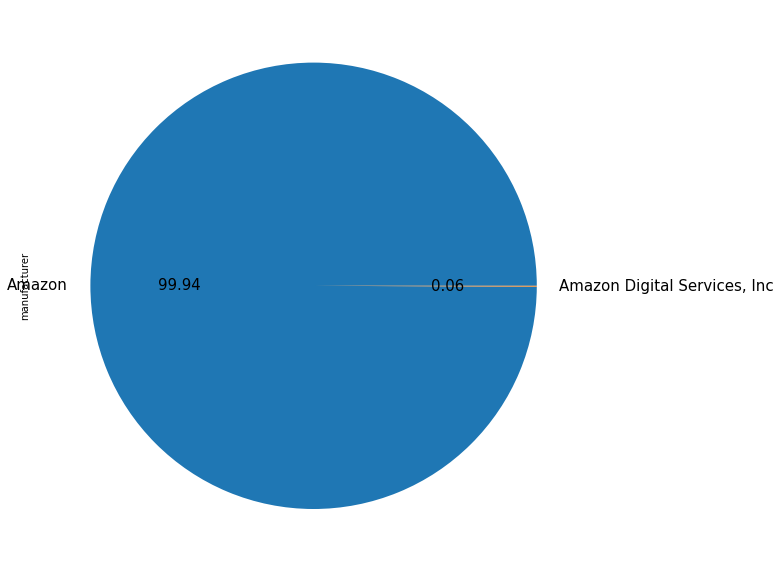

In [8]:
# Pie chart for product manufactures
df["manufacturer"].value_counts().plot.pie(figsize = (10,15),autopct = "%.2f" ,fontsize = 15)
print(df['manufacturer'].value_counts())

Interpretation: 99.94% of the products are sold by Amzon.

In [9]:
# Renaming brand names in numbers to avoid the overlapping of labels in visualization
diff_brand = {"Amazon":0,
              "Amazon Fire Tv":1,
              "Amazon Echo":2,
              "Amazon Fire":3,
              "Amazon Digital Services Inc.":4,
              "Amazon Coco T":5}
df['diff_brand']=df['brand'].map(diff_brand)

0    28701
1     5056
2      636
3      256
4       10
5        1
Name: diff_brand, dtype: int64


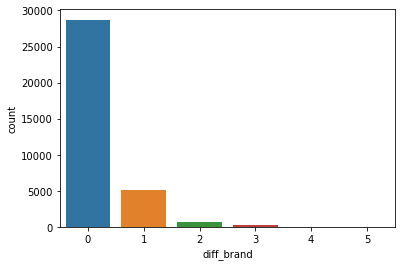

In [10]:
# Number of different brand products and its visualization
sb.countplot(x="diff_brand", data=df)
print(df['diff_brand'].value_counts())

In [92]:
#Visualizing reviews.rating with respect to reviews.doRecommend
rating=pd.crosstab(df['reviews.rating'],df['reviews.doRecommend'])
rating.iplot(kind="bar",barmode="stack")

Interpretation: If the rating is low then the recomandation to buy the product is false. 

In [12]:
#Most reviewed products
df['name'].value_counts().reset_index().head(1)

,index,name
0,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",10966


In [13]:
#Less reviewed products
df['name'].value_counts().reset_index().tail(11)

,index,name
37,Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Bl...,1
38,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,1
39,Certified Refurbished Amazon Fire TV Stick (Pr...,1
40,Amazon Standing Protective Case for Fire HD 6 ...,1
41,"Amazon Fire Tv,,,\r\nKindle Dx Leather Cover, ...",1
42,"Coconut Water Red Tea 16.5 Oz (pack of 12),,,\...",1
43,Certified Refurbished Amazon Fire TV Stick (Pr...,1
44,"Echo (Black),,,\r\nAmazon 9W PowerFast Officia...",1
45,"Echo (White),,,\r\nFire Tablet, 7 Display, Wi-...",1
46,Amazon Fire Hd 6 Standing Protective Case(4th ...,1


In [14]:
# Creating new dataframe
data = df[['reviews.text','reviews.rating']]

In [15]:
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [17]:
# Removing null values
data.dropna(subset = ['reviews.text', 'reviews.rating'],inplace = True)
data.isna().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [18]:
# Considering review ratings 1.0,2.0,3.0 as 0 (Negative reviews) and 4.0,5.0 as 1(Positive reviews)
# Creating new column sentiment
sentiment = {1: 0,2: 0,3: 0,4: 1,5: 1}
data['sentiment']=data['reviews.rating'].map(sentiment)# 

In [19]:
# Number of positive and negative reviews in the dataset
data['sentiment'].value_counts()

1    32315
0     2311
Name: sentiment, dtype: int64

In [20]:
# Printing the words that are used in reviews
words = pd.Series(' '.join(data['reviews.text']).split())
print(words.value_counts())
print("Total used words are {}".format(words.value_counts().sum()))

the                37618
to                 33180
and                32970
I                  30076
for                25273
                   ...  
changes:1.             1
voice.Just             1
immediately.The        1
Pro:                   1
Echo......very         1
Length: 37504, dtype: int64
Total used words are 1047227


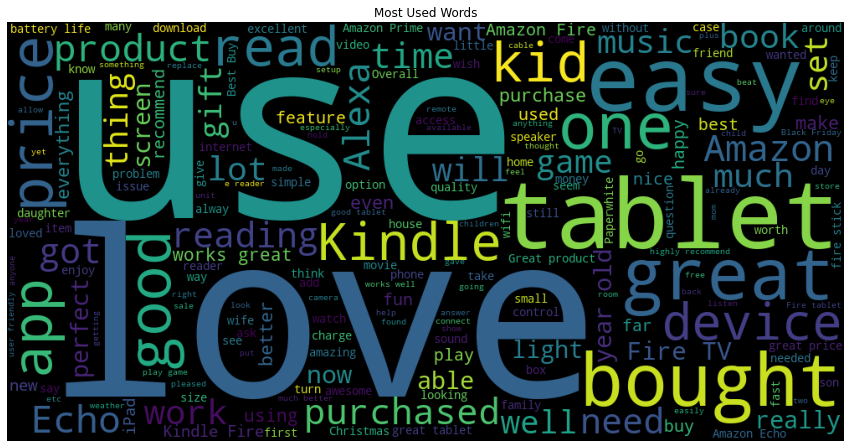

In [21]:
# Representation of words in all reviews 
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Used Words")
plt.axis("off")
plt.show()

In [22]:
# Words used in positive reviews
positive_words = pd.Series(' '.join(data[data['sentiment']==1]['reviews.text']).split())
print(positive_words.value_counts())
print("Total words used in positive review are {}".format(positive_words.value_counts().sum()))

the          33981
and          30787
to           30033
I            27279
for          23304
             ...  
gift?            1
Student          1
purshased        1
styling          1
warrants         1
Length: 34624, dtype: int64
Total words used in positive review are 950786


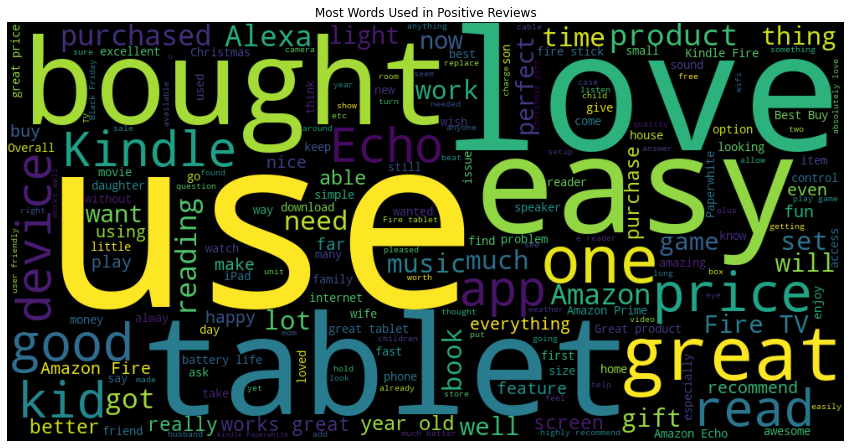

In [23]:
# Representation of words in positive reviews 
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Words Used in Positive Reviews")
plt.axis("off")
plt.show()

In [24]:
# Words used in negative reviews
negative_words = pd.Series(' '.join(data[data['sentiment']==0]['reviews.text']).split())
print(negative_words.value_counts())
print("Total words in negative reviews are {}".format(negative_words.value_counts().sum()))

the            3637
to             3147
I              2797
a              2263
it             2254
               ... 
fps)              1
impovement.       1
discount          1
bigger.           1
misses            1
Length: 9912, dtype: int64
Total words in negative reviews are 96441


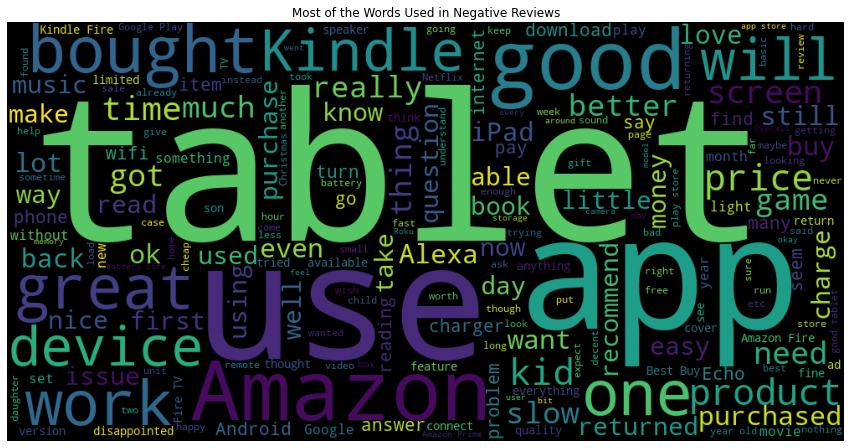

In [25]:
# Representation of words in negative reviews 
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most of the Words Used in Negative Reviews")
plt.axis("off")
plt.show()

In [26]:
# Text processing
lemm = nltk.WordNetLemmatizer()
stopword = nltk.corpus.stopwords.words('english') #stopwords
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text = re.sub('[0-9]+', '', text)
    tokens = re.split('\W+', text)    # tokenization
    text = [lemm.lemmatize(word) for word in tokens if word not in stopword]  # remove stopwords and lemmitizing
    return text

In [27]:
# Applying TF-IDF and considering only 500 words from the cleaned text
tfidf = TfidfVectorizer(analyzer=clean_text, max_features=500) 
X = tfidf.fit_transform(data['reviews.text']).toarray() #Independent variables
print('{} number of reviews has {} words'.format(X.shape[0], X.shape[1]))

34626 number of reviews has 500 words


In [28]:
y = data['sentiment'] #Dependent variable

In [29]:
tf_idf = pd.DataFrame(X, columns=tfidf.get_feature_names())
tf_idf.head()

,,ability,able,absolutely,access,account,actually,ad,add,added,...,worth,would,wouldnt,wrong,year,yet,young,youre,youtube,yr
0,0.0,0.350183,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.142267,0.0,0.161981,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.157677,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [31]:
X_train.shape, X_test.shape

((25969, 500), (8657, 500))

In [32]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced dataset
smk = SMOTETomek(random_state=42)
X_train,y_train=smk.fit_resample(X_train,y_train)

X_train.shape,y_train.shape

((48414, 500), (48414,))

# Machine Learning

In [34]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Naive Bayes

In [35]:
naive = GaussianNB().fit(X_train, y_train)
y_pred_naive =naive.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred_naive)

array([[ 310,  243],
       [1754, 6350]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_naive)

0.7693196257363983

In [38]:
print(classification_report(y_test,y_pred_naive))

              precision    recall  f1-score   support

           0       0.15      0.56      0.24       553
           1       0.96      0.78      0.86      8104

    accuracy                           0.77      8657
   macro avg       0.56      0.67      0.55      8657
weighted avg       0.91      0.77      0.82      8657



In [39]:
auc = roc_auc_score(y_test,y_pred_naive);auc

y_pred_prob_naive = naive.predict_proba(X_test);y_pred_prob_naive

array([[7.27019622e-109, 1.00000000e+000],
       [8.46104853e-217, 1.00000000e+000],
       [7.07138951e-228, 1.00000000e+000],
       ...,
       [2.35450762e-126, 1.00000000e+000],
       [2.43536967e-031, 1.00000000e+000],
       [9.99781633e-295, 1.00000000e+000]])

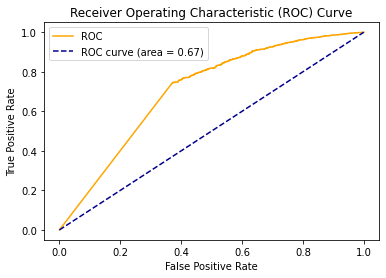

0.6720711670525483


In [40]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_naive[:,1])

# ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_naive))


# Random Forest

In [41]:
rf = RandomForestClassifier(random_state=265).fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [42]:
confusion_matrix(y_test,y_pred_rf)

array([[ 145,  408],
       [ 260, 7844]], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred_rf)

0.9228370105117246

In [44]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.36      0.26      0.30       553
           1       0.95      0.97      0.96      8104

    accuracy                           0.92      8657
   macro avg       0.65      0.62      0.63      8657
weighted avg       0.91      0.92      0.92      8657



In [45]:
auc_rf = roc_auc_score(y_test,y_pred_rf);auc_rf

0.6150616131341387

In [46]:
y_pred_prob_rf = rf.predict_proba(X_test);y_pred_prob_rf

array([[0.07, 0.93],
       [0.12, 0.88],
       [0.04, 0.96],
       ...,
       [0.08, 0.92],
       [0.04, 0.96],
       [0.  , 1.  ]])

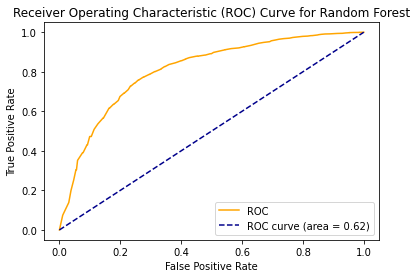

0.6150616131341387


In [47]:
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,y_pred_prob_rf[:,1])

# ROC curve
plt.plot(fpr_rf, tpr_rf, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_rf))


### Random Forest Parameter Tuning

In [48]:
leaves = [1,2,4,5,10,20,30,40,80,100]
grid_param_rf = {
    "n_estimators" : [10,20,30,40],
    'criterion': ['gini', 'entropy'],
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves 
}

In [49]:
grid_search = GridSearchCV(rf,grid_param_rf,cv=5,n_jobs =-1,verbose = 3).fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 40}

In [67]:
rf1 = RandomForestClassifier(criterion = 'gini',max_features = 'log2',
                            min_samples_leaf = 1,n_estimators = 40,random_state=265)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=40, random_state=265)

In [68]:
y_pred_rf1 = rf1.predict(X_test)

In [69]:
confusion_matrix(y_test,y_pred_rf1)

array([[ 132,  421],
       [ 251, 7853]], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred_rf1)

0.9223749566824535

In [71]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.34      0.24      0.28       553
           1       0.95      0.97      0.96      8104

    accuracy                           0.92      8657
   macro avg       0.65      0.60      0.62      8657
weighted avg       0.91      0.92      0.92      8657



In [72]:
auc_rf1 = roc_auc_score(y_test,y_pred_rf1);auc_rf1

0.6038628257605916

In [73]:
y_pred_prob_rf1 = rf1.predict_proba(X_test);y_pred_prob_rf1

array([[0.1  , 0.9  ],
       [0.025, 0.975],
       [0.025, 0.975],
       ...,
       [0.15 , 0.85 ],
       [0.05 , 0.95 ],
       [0.   , 1.   ]])

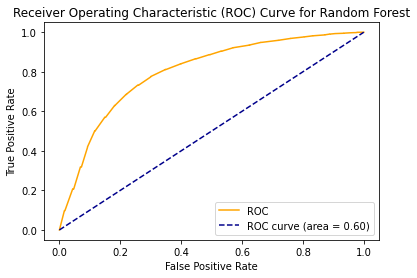

0.6038628257605916


In [74]:
fpr_rf1,tpr_rf1,thresholds_rf1 = roc_curve(y_test,y_pred_prob_rf1[:,1])

# ROC curve
plt.plot(fpr_rf1, tpr_rf1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_rf1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_rf1))

### XG Boost

In [75]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 265).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

[20:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
confusion_matrix(y_test,y_pred_xgb)

array([[ 284,  269],
       [ 755, 7349]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred_xgb)

0.8817142197065958

In [78]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.27      0.51      0.36       553
           1       0.96      0.91      0.93      8104

    accuracy                           0.88      8657
   macro avg       0.62      0.71      0.65      8657
weighted avg       0.92      0.88      0.90      8657



In [79]:
auc_xgb = roc_auc_score(y_test,y_pred_xgb);auc_xgb

0.7101992586430651

In [80]:
y_pred_prob_xgb = xgb.predict_proba(X_test);y_pred_prob_xgb

array([[0.23663348, 0.7633665 ],
       [0.01937014, 0.98062986],
       [0.02339059, 0.9766094 ],
       ...,
       [0.05764782, 0.9423522 ],
       [0.14074522, 0.8592548 ],
       [0.01624852, 0.9837515 ]], dtype=float32)

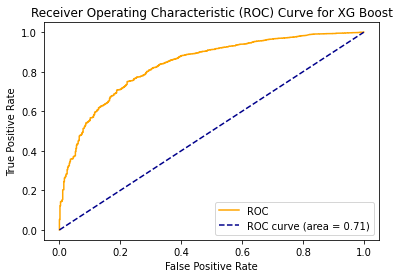

0.7101992586430651


In [81]:
fpr_xgb,tpr_xgb,thresholds_xgb = roc_curve(y_test,y_pred_prob_xgb[:,1])

# ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XG Boost')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_xgb))

### XG Boost Parameter Tuning

In [82]:
grid_param_xgb={'n_estimators' : [150,300],'learning_rate':[.001,0.01,0.1]}
grid_search_xgb = GridSearchCV(xgb,grid_param_xgb,cv=5,n_jobs =-1,verbose = 3)

In [83]:
grid_search_xgb.fit(X_train,y_train)
grid_search_xgb.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[20:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1, 'n_estimators': 300}

In [84]:
xgb1 = XGBClassifier(learning_rate = 0.1, n_estimators = 300,random_state = 265).fit(X_train,y_train)
y_pred_xgb1 = xgb1.predict(X_test)

[21:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
confusion_matrix(y_test,y_pred_xgb1)

array([[ 282,  271],
       [ 753, 7351]], dtype=int64)

In [86]:
accuracy_score(y_test,y_pred_xgb1)

0.8817142197065958

In [87]:
print(classification_report(y_test,y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.27      0.51      0.36       553
           1       0.96      0.91      0.93      8104

    accuracy                           0.88      8657
   macro avg       0.62      0.71      0.65      8657
weighted avg       0.92      0.88      0.90      8657



In [88]:
auc_xgb1 = roc_auc_score(y_test,y_pred_xgb1);auc_xgb1

0.70851433623295

In [89]:
y_pred_prob_xgb1 = xgb1.predict_proba(X_test);y_pred_prob_xgb1

array([[0.38398516, 0.61601484],
       [0.02212602, 0.977874  ],
       [0.01829249, 0.9817075 ],
       ...,
       [0.07816195, 0.92183805],
       [0.26519662, 0.7348034 ],
       [0.01553428, 0.9844657 ]], dtype=float32)

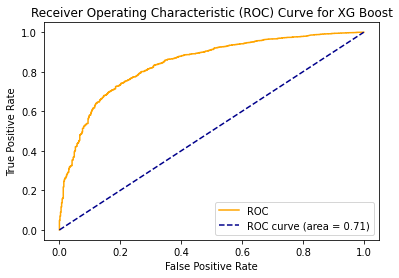

0.70851433623295


In [90]:
fpr_xgb1,tpr_xgb1,thresholds_xgb1 = roc_curve(y_test,y_pred_prob_xgb1[:,1])

# ROC curve
plt.plot(fpr_xgb1, tpr_xgb1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_xgb1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XG Boost')
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_pred_xgb1))

### Text Processing

##### Positive Reviews:

The text reviews which has rating 4.0 and 5.0 are considered as positive reviews.

##### Negative Reiews:

The text reviews which has rating 1.0,2.0 and 3.0 are considered as negative reviews.

##### Stopwords:

The words which are commonly used and which carry very less information.
            
            Example: a,the,is,i,are etc
            
##### Tokenization:

The process of converting text into smaller units called tokens and tokens may be words or charecters.

##### Lemmatization:

It is a method responsible for grouping different inflected forms of words into the root form, having the same meaning.
            
            Example: finally and finalized can be converted into final.